# Importing The Data & First Clean

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium as folium
from folium.plugins import HeatMap

In [74]:
#Dataset availables at: https://www.kaggle.com/datasets/chasebank/bank-deposits
chase = pd.read_csv('/Users/marccolin/Desktop/EDHEC Course/Python & Machine Learning/PTH - Exam/chasedata.csv')
chase.head(5)

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594


In [75]:
#Defining the key elements for the analyses
Lat = chase["Latitude"]
Lon = chase["Longitude"]
Street = chase["Street Address"]
Dep_2010 = chase["2010 Deposits"]
Dep_2011 = chase["2011 Deposits"]
Dep_2012 = chase["2012 Deposits"]
Dep_2013 = chase["2013 Deposits"]
Dep_2014 = chase["2014 Deposits"]
Dep_2015 = chase["2015 Deposits"]
Dep_2016 = chase["2016 Deposits"]

#Defining error values to do some more cleaning later
nan_value = float("NaN")

Narrowing the dataset to only columns that will be of interest is a first way of cleaning the data

# Deposit Analysis over Time

In [76]:
yr_deposits = pd.concat([Dep_2010,Dep_2011,Dep_2012,Dep_2013,Dep_2014,Dep_2015,Dep_2016],axis=1)
#Second cleaning by replacing empties by NaNs, and then deleting all NaNs
yr_deposits.replace("", nan_value, inplace=True)
yr_deposits.dropna(inplace=True)
#A bit of formatting
yr_deposits.columns = [2010,2011,2012,2013,2014,2015,2016]
yr_deposits.describe().style.format('{:,}')

,2010,2011,2012,2013,2014,2015,2016
count,"4,673.0","4,673.0","4,673.0","4,673.0","4,673.0","4,673.0","4,673.0"
mean,"266,865.68499893","313,946.1709822384","350,751.14487481274","385,952.9914401883","434,376.5600256794","449,367.50374491763","487,204.99315215065"
std,"9,568,754.962254805","11,299,094.350757916","12,634,606.200332437","13,893,545.517293384","15,645,681.070250588","16,194,536.42642191","17,574,298.080040693"
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"22,526.0","25,118.0","29,474.0","32,882.0","36,609.0","40,689.0","45,442.0"
50%,"43,072.0","45,898.0","51,346.0","56,555.0","62,419.0","68,625.0","76,722.0"
75%,"85,027.0","88,571.0","96,404.0","103,228.0","112,031.0","121,418.0","135,559.0"
max,"633,131,000.0","743,268,000.0","832,455,000.0","916,543,000.0","1,032,549,000.0","1,069,425,000.0","1,155,185,000.0"


This table is important as it shows that deposits have nearly doubled in value over 6 years. Both bottom 25% and top 75% have seen large improvements, which also shows a healthy growth. 

In [77]:
#Counting the sum of deposits of all branches to get a yearly value
year_sum = yr_deposits.sum()
year_sum

2010    1.247063e+09
2011    1.467070e+09
2012    1.639060e+09
2013    1.803558e+09
2014    2.029842e+09
2015    2.099894e+09
2016    2.276709e+09
dtype: float64

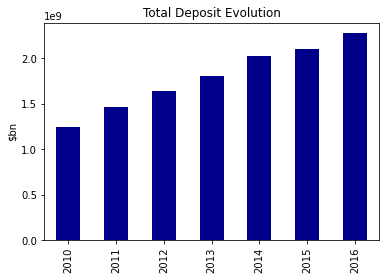

In [78]:
#Plotting the evolution in a chart
year_sum.plot(kind='bar',color='darkblue')
plt.ylabel("$bn")
plt.title("Total Deposit Evolution")
plt.show()

This chart shows that the total amounts deposited increase in a more visual manner. This is a key metric since the more deposits in a bank, the more it can lend, and the more the performance from interest repayments. Therefore, we can directly correlate this data with performance. We can also use it as a metric of the public's trust in the bank, which will have an impact on its stock price (JP Morgan indirectly).

# 2010 vs. 2016 Heatmap

In [79]:
#Defining the two datasets
deposit_data10 = pd.concat([Street,Lat,Lon,Dep_2010],axis=1)
deposit_data16 = pd.concat([Street,Lat,Lon,Dep_2016],axis=1)
deposit_data10.groupby(["Street Address"])
deposit_data16.groupby(["Street Address"])

In [80]:
#cleaning the datasets to exclude errors
deposit_data10.replace("", nan_value, inplace=True)
deposit_data10.dropna(inplace=True)
deposit_data16.replace("", nan_value, inplace=True)
deposit_data16.dropna(inplace=True)

In [81]:
#Creating the 2010 heatmap
deposit_map10 = folium.Map(location=[30.751278,-100.955284], zoom_start=4)
lat_lon10 = deposit_data10[["Latitude","Longitude"]].values
HeatMap(lat_lon10, radius=12).add_to(deposit_map10)
deposit_map10

In [82]:
#Creating the 2016 heatmap
deposit_map16 = folium.Map(location=[30.751278,-100.955284], zoom_start=4)
lat_lon16 = deposit_data16[["Latitude","Longitude"]].values
HeatMap(lat_lon16, radius=12).add_to(deposit_map16)
deposit_map16

These heatmaps show the evolution at a large scale. From that we can identify the key areas where Chase operates. We can see that if the company was to announce the closure of one the New York branches, there would be a much larger impact on revenues. Overall between 2010 and 2016, there has not been a major shift in Chase's activity, but we can zoom into the different points of each map to find the evolution of each area.

# Conclusion/Investment Signal

The analysis shows two possible signals for an investor:
- First, the amounts deposited can be used to predict interest income and to assess trust. A decrease in total amounts deposited would most likely lead to lower performance and indicate a strong sell signal. 
- Second, the heatmaps can be used to quickly assess the earnings impacts of a branch closure. Depending on the scale of the deposits in each area, a buy/sell signal would be applied.

But this dataset could not be used in real life. First because this data is unlikely to be accessed, but also because Chase is a subsidiary of JP Morgan. Since JP Morgan is a different entity with different revenue lines, and Chase is not the main generator of income, a negative investment signal from this data can easily be offset by positive results at the group level. 